In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = "Resource/globalterrorism.csv"
terrorism = pd.read_csv(file,encoding="ISO-8859-1")
terrorism.head()
terrorism.count()
terrorismdf = terrorism.dropna(how='any')
terrorismdf.count()
terrorismdf.dtypes
terrorismdf['success'] = pd.to_numeric(terrorismdf['success'])

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Attacks by Region, City, and Country

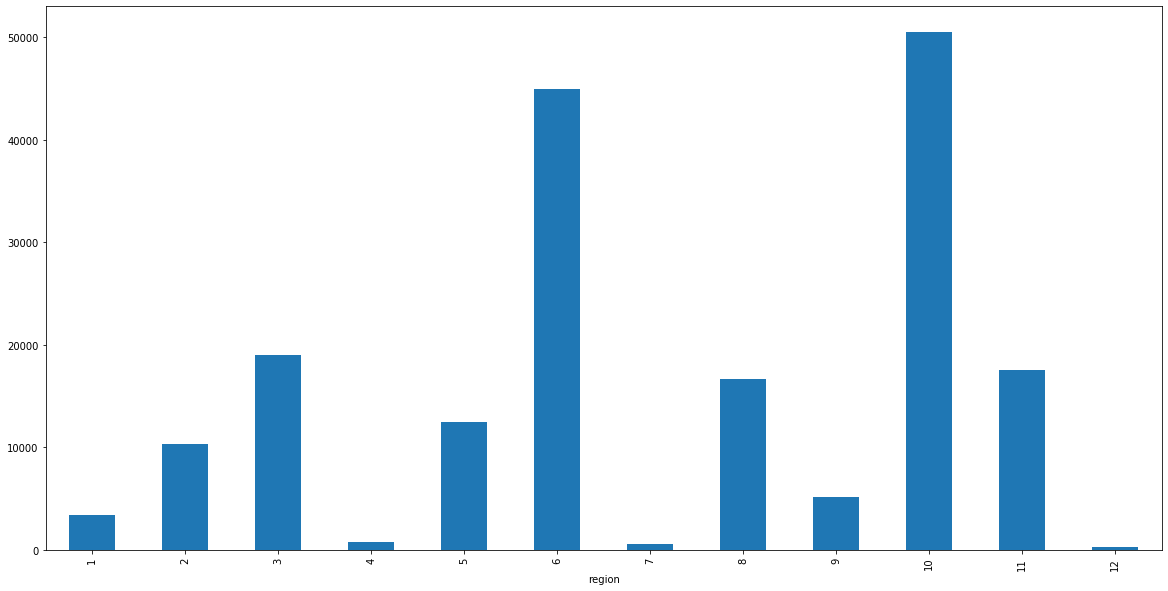

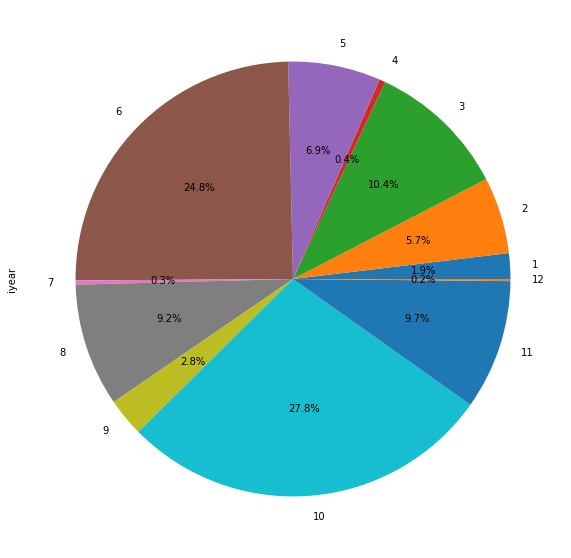

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EED80AA5F8>],
      dtype=object)

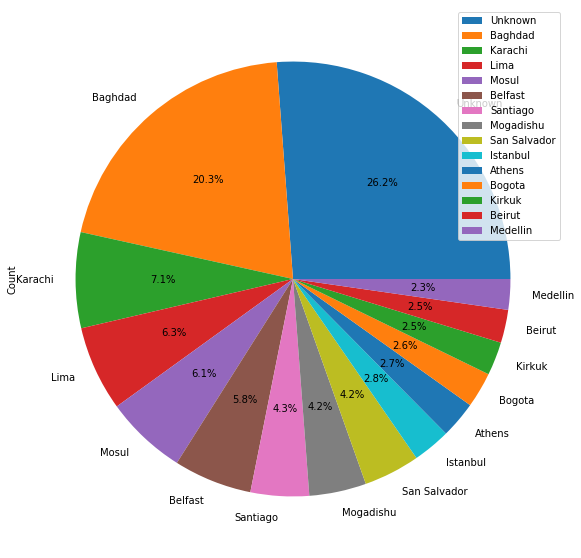

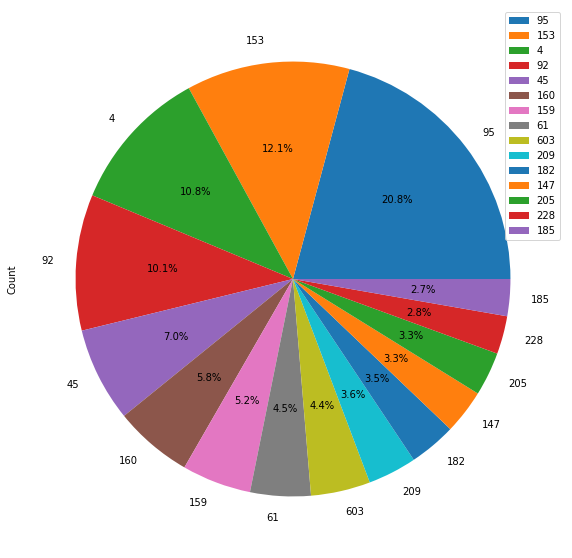

In [4]:
#attacks by region, city, country
#Number of Region Attacks
region = terrorism.groupby("region")
regionyear = region["iyear"]
total = len(terrorism)
regionyears = regionyear.count()
regionyears.plot(kind="bar", figsize=(20,10))
plt.show()
percentages = regionyears/total * 100
percentages
percentages.plot(kind="pie",autopct="%1.1f%%", figsize=(20,10))
plt.show()
#number of city attacks
city = terrorism.groupby("city")["region"].count()
cityattacks = pd.DataFrame({"Count":city})
cityatt = cityattacks.nlargest(15,'Count')
cityatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))

#number of ccountry attacks
country = terrorism.groupby("country")["region"].count()

countryattacks = pd.DataFrame({"Count":country})
countryatt = countryattacks.nlargest(15,'Count')
countryatt
countryatt.plot(kind="pie",subplots = True,autopct="%1.1f%%", figsize=(30,10))

#which country and city has suffered the most attack

#which country in each region has suffered the most attack


## Success Rate of Attacks in each Region

0        1
1        1
2        1
3        1
4        1
5        1
6        0
7        1
8        1
9        1
12       1
15       1
16       1
21       1
25       1
26       1
27       1
34       1
39       0
59       1
62       1
79       1
95       1
96       1
112      1
123      1
132      1
133      1
150      1
151      1
152      1
158      1
161      1
162      1
165      1
195      1
226      1
241      1
258      1
275      1
565      1
585      1
668      1
679      1
1085     1
1087     1
1186     1
1479     1
1547     0
1548     0
1851     1
1863     0
2003     1
2217     1
2705     1
47639    1
48013    1
48086    1
48333    1
49182    1
Name: success, dtype: int64

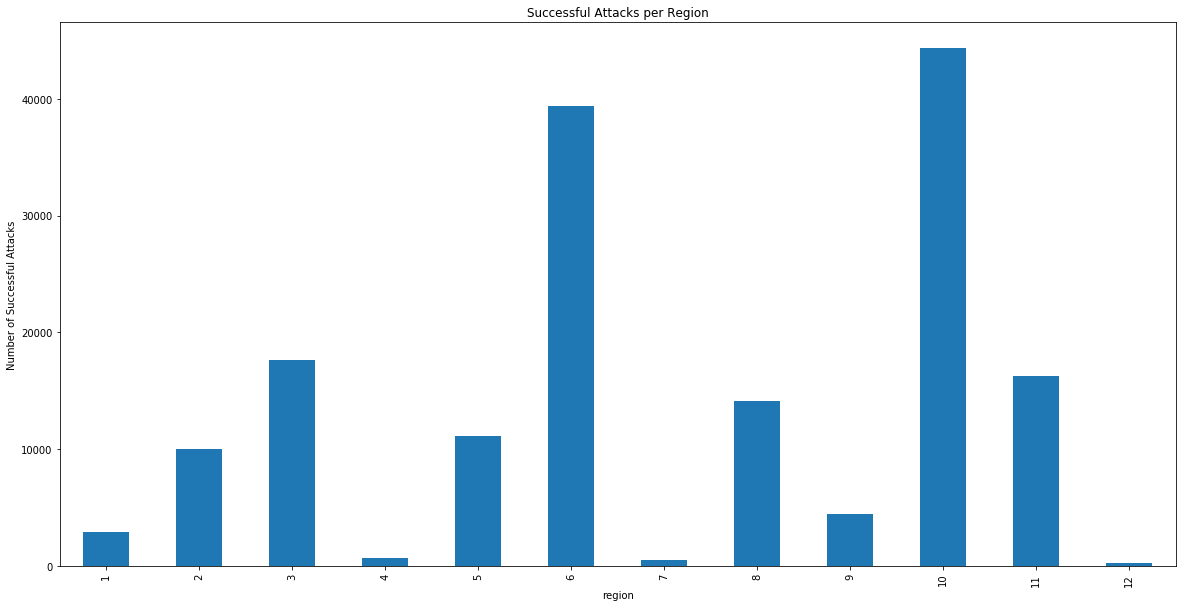

In [10]:
#success rate by region
regionsuccess = terrorism.groupby("region")["success"]
success = regionsuccess.sum()
successes = regionsuccess.count()
bar = success.plot(kind="bar", figsize=(20,10))
plt.title('Successful Attacks per Region')
plt.xlabel('region')
plt.ylabel('Number of Successful Attacks')
regionsuccess.head()
#unique to seperate into 1 and 0

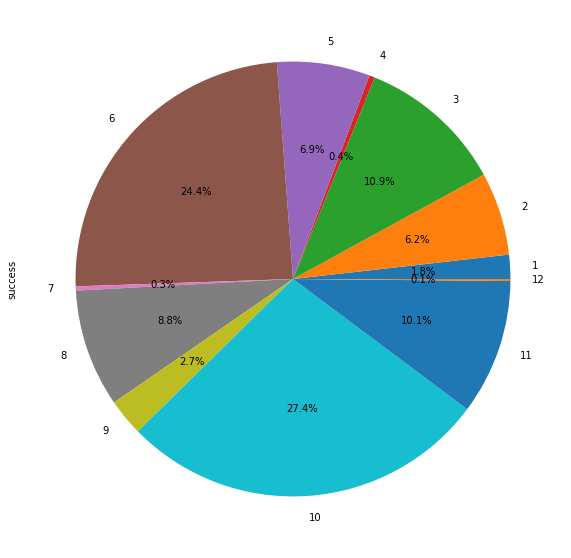

In [6]:
pie = success.plot(kind="pie",autopct="%1.1f%%", figsize=(20,10))


## Attack of Terrorism or not? Doubt

0        0.0
1        0.0
2        0.0
3        0.0
4       -9.0
5        0.0
6        0.0
7        1.0
8        0.0
9        0.0
12      -9.0
15       0.0
16       1.0
21       0.0
25       0.0
26       0.0
27       0.0
34      -9.0
39       1.0
59       0.0
62       0.0
79       0.0
95      -9.0
96       0.0
112      0.0
123      0.0
132      0.0
133      0.0
150      1.0
151      1.0
152      0.0
158      0.0
161      0.0
162      0.0
165      0.0
195      0.0
226      0.0
241     -9.0
258      0.0
275      0.0
565      0.0
585      0.0
668      0.0
679      0.0
1085     0.0
1087    -9.0
1186     0.0
1479     0.0
1547     0.0
1548     0.0
1851     1.0
1863     0.0
2003    -9.0
2217     0.0
2705     0.0
47639    0.0
48013    0.0
48086   -9.0
48333    0.0
49182    0.0
Name: doubtterr, dtype: float64


NameError: name 'doubtterr' is not defined

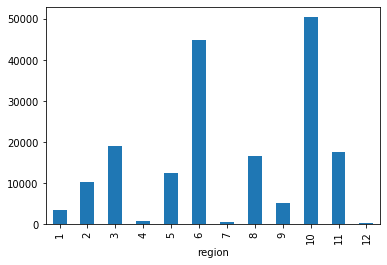

In [18]:
#regional Doubt which region has the most doubt
#regiondoubt = terrorism.groupby("doubtterr")["region"]
regiondoubtsss = terrorism.groupby("region")["doubtterr"]
doubt = regiondoubtsss.count()
regiondoubts = regiondoubt.count()
regiondoubtsss.head()
doubt.plot(kind = "bar")
print(regiondoubtsss.head())
#split into 0's and 1's
#counts = terrorism.groupby("region")["doubtterr"]
#doubtbyregion = pd.DataFrame({"Region":counts})
#newdf = doubtbyregion.applymap(lambda x: x[0] if isinstance(x, list) else x)
#print(newdf)
#regiondoubts/total * 100
#print(doubtbyregion.sum())
#doubtbyregion.plot(kind="bar", figsize=(20,10))

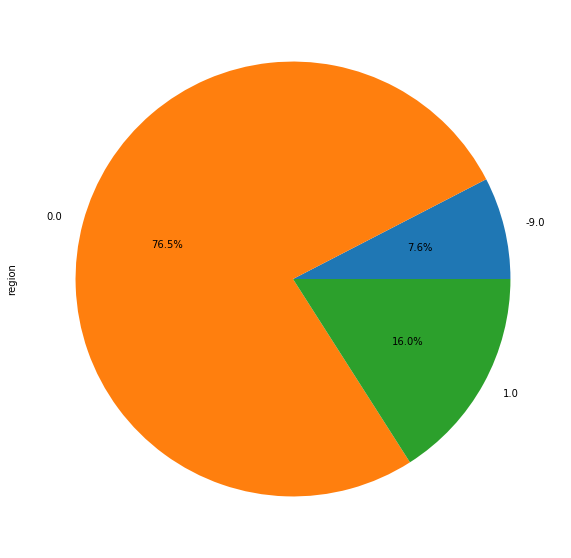

In [8]:
regiondoubts.plot(kind="pie",autopct="%1.1f%%", figsize=(20,10))

President
Nixon       2744
Ford        2982
Carter      9436
Reagan     25912
Bush       13641
Clinton    18841
W Bush     21320
Obama      86815
Name: iyear, dtype: int64

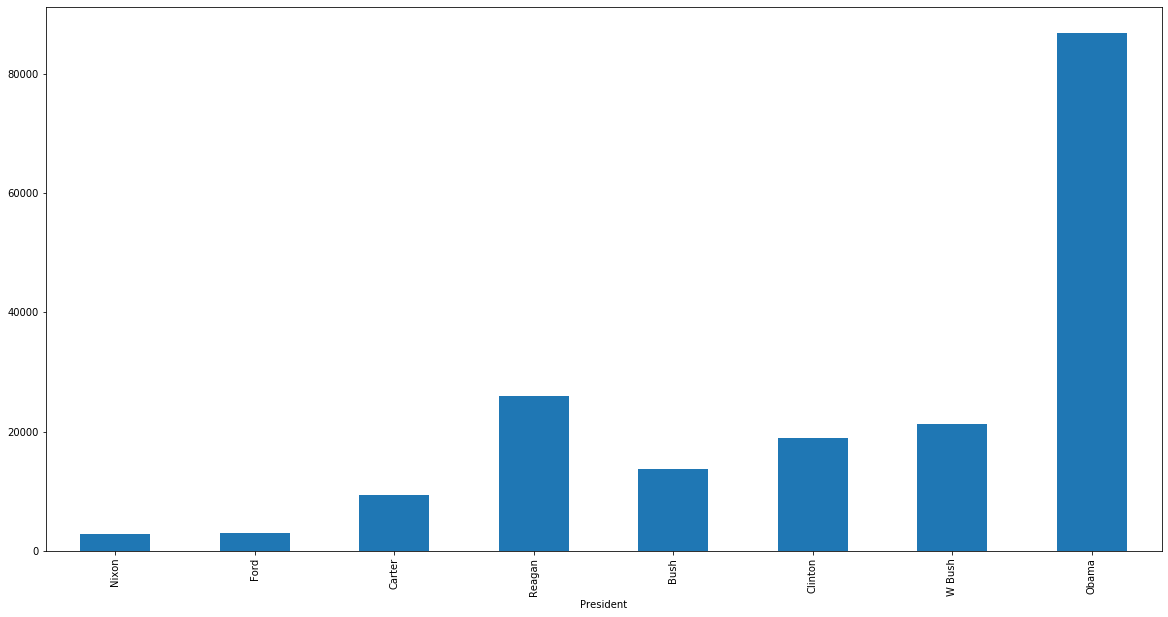

In [9]:
#comparasion to US presidents
term = [1969,1974,1977,1981,1989,1993,2001,2009,2017]
president = ["Nixon","Ford","Carter","Reagan","Bush","Clinton","W Bush","Obama"]
terrorism["President"] = pd.cut(terrorism["iyear"],term,labels = president)
presidentcount = terrorism.groupby("President")["iyear"]
counts = presidentcount.count()
counts.plot(kind="bar", figsize=(20,10))
counts